In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import statistics as stat
import os
from pathlib import Path

In [2]:
date = '2018-12-07'
path = "C://Users/brouhardlab/Documents/GitHub/sofia-brouhardlab/"+date+"_DIC/"

ch = ['22','23','31','32','33']
conc_name = ['10','15','7-5','12-5','20']
conc = [10,15,7.5,12.5,20]
inter_s = [10,10,10,10,10]
path

'C://Users/brouhardlab/Documents/GitHub/sofia-brouhardlab/2018-12-07_DIC/'

In [4]:
def dynamics(k):
    
    filename = path+date+'_CH'+ch[k]+'_'+conc_name[k]+'uM'
    
    data = pd.read_csv(filename+'.csv',sep=',');
    supp = pd.read_csv(filename+'_start.csv',sep=',');
    
    inter = inter_s[k];
    
    n = len(supp['Track ID'])
    start = sum(supp['Track duration (s)'])/n;
    
    ####################################
    
    oddID = [n-1 for n in data['Track ID'] if n%2]
    growth = []
    
    for i in oddID:
        g = abs(data['Track speed (um/s)'][i])*60;
        growth = np.append(growth,g)
       
    ####################################
    
    evenID = [n for n in data['Track ID'] if n%2]
    
    y1 = []
    lifetime = []
    
    for i in evenID:
        y1 = np.append(y1,min(data['y1'][i],data['y2'][i]))
        y2 = max(data['y1'][i],data['y2'][i])
        
        if y2 < 119:
            lt = (data['Track duration (s)'][i]);
            lifetime = np.append(lifetime,lt/60)
    
    nuc_lag = (y1*inter - start)/60;
    
    ######################################
        
    return growth, nuc_lag , lifetime

In [5]:
def save_raw(j,name):

    track = dynamics(0)
    df = pd.DataFrame(track[j], columns=[str(conc[0])])

    for i in range(1,len(ch)):
    
        track = dynamics(i)
        df0 = pd.DataFrame(track[j], columns=[str(conc[i])])
        df = pd.concat([df, df0], axis=1, sort=False)

    df.to_csv(path+date+'_'+name+'.csv', encoding='utf-8', index=False)

In [6]:
name = ['growth','nuc-lag','lifetime']

for j in [0,1,2]:
    save_raw(j,name[j])

In [7]:
def get_mean_std(name):
    data = pd.read_csv(path+date+'_'+name+'.csv',sep=',');

    mean = []
    sdev = []

    #mean = data.mean(axis=0)
    for i in data.columns:
        mean = np.append(mean,data[i].mean())
        sdev = np.append(sdev,data[i].std())
    
    df = pd.DataFrame([mean, sdev], columns=data.columns, index=[name+' mean', name+' std'])

    return df

In [8]:
df = get_mean_std(name[0])
df = df.append(get_mean_std(name[1]))
df = df.append(get_mean_std(name[2]))
df = df.T
df.to_csv(path+date+'_data.csv', encoding='utf-8', index=True)

In [9]:
data = pd.read_csv(path+date+'_data.csv',sep=',', index_col=0);
data

,growth mean,growth std,nuc-lag mean,nuc-lag std,lifetime mean,lifetime std
10.0,0.518824,0.211006,1.014706,2.904773,2.058824,1.081635
15.0,0.520000,0.131339,2.174242,3.194258,5.955128,3.309098
7.5,0.310909,0.125336,4.704545,4.983914,4.407407,3.149196
12.5,0.468000,0.104105,3.616667,3.324814,4.500000,2.267592
20.0,1.292000,0.370446,1.033333,1.991914,9.630952,4.840701


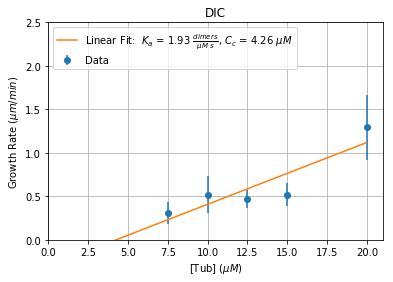

In [10]:
a1 , a0 = np.polyfit(data.index, data['growth mean'], 1)
y_int = -a0/a1
x_range = np.arange(0,20,0.1)

plt.errorbar(data.index, data['growth mean'], yerr=data['growth std'], fmt='o')
plt.plot(x_range, a1*x_range+a0)
plt.legend(('Linear Fit:  'r'$K_a$'' = %.2f 'r'$\frac{dimers}{\mu M \; s}$'', 'r'$C_c$'' = %.2f 'r'$\mu M$' %(a1*27.1, y_int),'Data'),loc='upper left')
plt.xlabel('[Tub] ' r'$(\mu M)$')
plt.ylabel('Growth Rate ' r'$(\mu m / min)$')
plt.ylim(0,2.5)
plt.xlim(0,21)
plt.grid(True)
plt.title('DIC');
plt.savefig(path+date+'_growth.pdf')

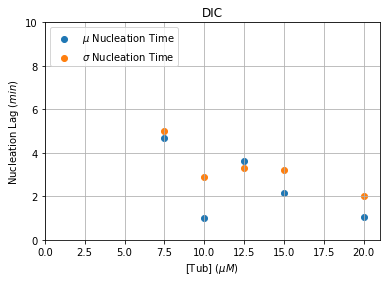

In [11]:
plt.scatter(data.index, data['nuc-lag mean'])
plt.scatter(data.index, data['nuc-lag std'])
plt.legend(( r'$\mu$' ' Nucleation Time',r'$\sigma$' ' Nucleation Time'),loc='upper left')
plt.xlabel('[Tub] ' r'$(\mu M)$')
plt.ylabel('Nucleation Lag ' r'$(min)$')
plt.ylim(0,10)
plt.xlim(0,21)
plt.grid(True)
plt.title('DIC');
plt.savefig(path+date+'_nuc-lag.pdf')

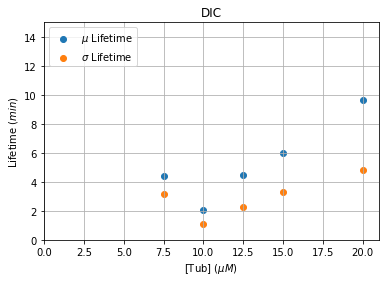

In [12]:
plt.scatter(data.index, data['lifetime mean'])
plt.scatter(data.index, data['lifetime std'])
plt.legend(( r'$\mu$' ' Lifetime',r'$\sigma$' ' Lifetime'),loc='upper left')
plt.xlabel('[Tub] ' r'$(\mu M)$')
plt.ylabel('Lifetime ' r'$(min)$')
plt.ylim(0,15)
plt.xlim(0,21)
plt.grid(True)
plt.title('DIC');
plt.savefig(path+date+'_lifetime.pdf')

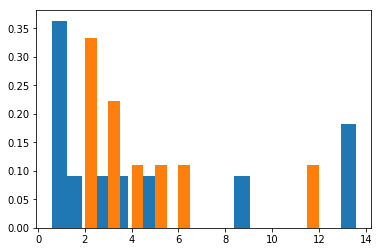

In [13]:
track = dynamics(2)

for i in [1,2] :
    weights = np.ones_like(track[i])/float(len(track[i]))
    plt.hist(track[i],20, weights=weights)